

<!DOCTYPE html>
<html>
<body>

<p style="font-size:50px">Final Assignment</p>

</body>
</html>




<!DOCTYPE html>
<html>
<body>

<p style="font-size:40px">Introduction:</p>
<p style="font-size:20px">Chile is a country in south america, Santiago being its capital and major city, it has several comunas and the populations is around 6 million people.</p>

    
<p style="font-size:20px"> Las Condes and Vitacura are two comunas,both are one of the most wealthy and with alot of venues and activities. High tourism and very active people lives in these comunas. </p>
    
    
<p style="font-size:20px"> Jack wants to open a new business in Santiago, Chile but he does not now if it is better to open it in Vitacura or Las Condes. He does not want to be in a high competitive neighbohood and want to acquire lots of clients in roder to get high incomes. His business is a sports gym. He wants to know win hich comuna is better to open it</p>

</body>
</html>



<!DOCTYPE html>
<html>
<body>

<p style="font-size:30px">DATA:</p>
<p style="font-size:20px">



Analyze both Las Condes and Vitacura


Foursquare API: I will be using the Foursquare API to explore the nearby venues for both neighborhoods to find the most accurate place to open the Shop. I looked for venues up to 2km range from the latitude and longitude of neighborhoods From the foursquare API, I will be retrieving the following for each nearby venue:

• Name • Category • Latitude • Longitude </p>
    
</body>
</html>

In [159]:
import numpy as np # library to handle data in a vectorized manner
! pip install geocoder
! pip install geopy
! pip install BeautifulSoup4
!pip install folium
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
# library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Libraries imported.")

Libraries imported.


In [57]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup

import folium

In [58]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [60]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

In [61]:
!pip install geopy

<!DOCTYPE html>
<html>
<body>

<p style="font-size:50px">Sports Centres in Vitacura:</p>

</body>
</html>

In [65]:
address = 'Vitacura, Santiago, Chile'

#geolocator = Nominatim()
geolocator = Nominatim(user_agent="http")


location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Vitacura, Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Vitacura, Santiago are -33.3802063, -70.56579553780725.


In [66]:
KSU_LATITUDE = -33.3802063
KSU_LONGITUDE = -70.56579553780725
print('The geograpical coordinates of Vitacura, Santiago are {}, {}.'.format(KSU_LATITUDE, KSU_LONGITUDE))

The geograpical coordinates of Vitacura, Santiago are -33.3802063, -70.56579553780725.


In [67]:
!pip install folium

In [68]:
import folium
ksu_map = folium.Map(location = [KSU_LATITUDE, KSU_LONGITUDE], zoom_start = 15)
folium.Marker([KSU_LATITUDE, KSU_LONGITUDE]).add_to(ksu_map)

ksu_map

In [69]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [70]:

limit= 100 
radius= 2000

In [76]:
CLIENT_ID = 'OWPVY0P2YMAW5TTUDGTGEUE3XZVYNETSR0OWZOJAOKISQDE0' # your Foursquare ID
CLIENT_SECRET = 'PCCZA5MMSICG3OCYUGQE3DT10R3VMGPSMTNDEZX11EL1W4FV' # your Foursquare Secret
VERSION = '20201201'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OWPVY0P2YMAW5TTUDGTGEUE3XZVYNETSR0OWZOJAOKISQDE0
CLIENT_SECRET:PCCZA5MMSICG3OCYUGQE3DT10R3VMGPSMTNDEZX11EL1W4FV


In [77]:

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        KSU_LATITUDE, 
                                                                        KSU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
url

'https://api.foursquare.com/v2/venues/explore?&client_id=OWPVY0P2YMAW5TTUDGTGEUE3XZVYNETSR0OWZOJAOKISQDE0&client_secret=PCCZA5MMSICG3OCYUGQE3DT10R3VMGPSMTNDEZX11EL1W4FV&v=20201201&ll=-33.3802063,-70.56579553780725&radius=2000&limit=100'

In [78]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fc66500e923bf4081eeb774'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Vitacura',
  'headerFullLocation': 'Vitacura, Santiago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 153,
  'suggestedBounds': {'ne': {'lat': -33.36220628199998,
    'lng': -70.5442798580168},
   'sw': {'lat': -33.398206318000014, 'lng': -70.5873112175977}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cacb9f2f47ea1431cea9321',
       'name': 'Club de Golf Sport Francés',
       'location': {'address': 'Lo Beltrán',
        'lat': -33.38014557297731,
        'lng': -70.56251848467465,
        'labeledLatLngs': [{'label': 'display',
          'lat

In [80]:
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Club de Golf Sport Francés,Golf Course,-33.380146,-70.562518
1,Spa One & Only,Spa,-33.382544,-70.572007
2,La Chocolatine,Bakery,-33.386412,-70.563223
3,La Guapa Simona,Salon / Barbershop,-33.382437,-70.571933
4,Centro Cultural Amanda,Music Venue,-33.387675,-70.567996
5,Kadó Regalos Con Sentido,Gift Shop,-33.381331,-70.571176
6,Pasteleria y Heladeria - La Ermita,Ice Cream Shop,-33.383683,-70.573423
7,Zuki Louge & Nikkei,Sushi Restaurant,-33.385687,-70.559630
8,Tottus Vitacura,Supermarket,-33.386647,-70.565337
9,Pet Clinic,Veterinarian,-33.386457,-70.566747


In [81]:
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)

100

In [82]:
#locationlist[7]
mapUIO = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

for point in range(0, len(locationlist)):
    #folium.RegularPolygonMarker(locationlist[point], line_color='#3186cc',fill_color='#3186cc', popup=nearby_venues['name'][point]).add_to(mapUIO)
    folium.CircleMarker(
        locationlist[point],
        number_of_sides=4,
        radius=5,
        popup=nearby_venues['name'][point],
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(mapUIO) 
mapUIO

In [83]:
KSU_categories= nearby_venues['categories']
KSU_categories_df = pd.DataFrame(KSU_categories)
KSU_categories_df

,categories
0,Golf Course
1,Spa
2,Bakery
3,Salon / Barbershop
4,Music Venue
5,Gift Shop
6,Ice Cream Shop
7,Sushi Restaurant
8,Supermarket
9,Veterinarian


In [84]:
KSU_unique_categories=pd.DataFrame(KSU_categories_df.categories.unique())
KSU_unique_categories_counts= nearby_venues["categories"].value_counts

In [85]:

KSU_unique_categories_counts
KSU_unique_categories.count()

0    56
dtype: int64

In [86]:
KSU_unique_categories_counts=pd.DataFrame(nearby_venues['categories'].value_counts())
KSU_unique_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

KSU_unique_categories_counts.index.name ='Categories'
KSU_unique_categories_counts

,value_counts
Categories,
Café,6
Italian Restaurant,4
Restaurant,4
Gym / Fitness Center,4
Bakery,4
Pet Store,3
Sushi Restaurant,3
Sandwich Place,3
Gym,3


In [87]:

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0], dtype=int32)

In [88]:
# add Cluster number to locations
#np.concatenate((locations,kmeans.labels_[:,None]),axis=1)
locations_clusters = np.column_stack((locations, kmeans.labels_))
#locations_clusters

In [89]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[KSU_LATITUDE, KSU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locations_clusters)):
    location = np.append(locations_clusters[point][0],locations_clusters[point][1])
    cluster = int(locations_clusters[point][2])
    label = folium.Popup(str(nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters) 
map_clusters

In [90]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


<function matplotlib.pyplot.show(*args, **kw)>

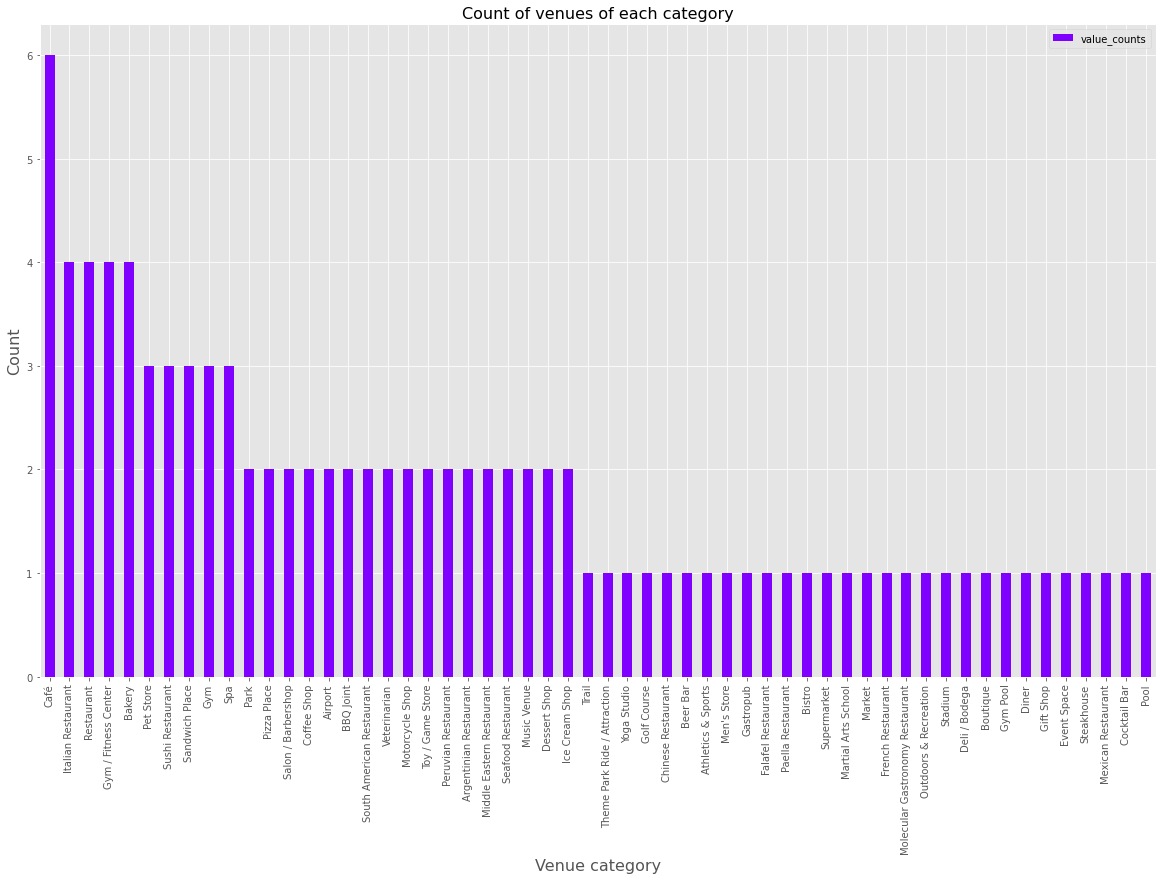

In [91]:
colors = cm.rainbow(np.linspace(0, 1, len(KSU_unique_categories_counts.index)))

KSU_unique_categories_counts.plot(kind='bar', figsize=(20,12), color= colors)


plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)

plt.show

In [92]:
KSU_categories_df

,categories
0,Golf Course
1,Spa
2,Bakery
3,Salon / Barbershop
4,Music Venue
5,Gift Shop
6,Ice Cream Shop
7,Sushi Restaurant
8,Supermarket
9,Veterinarian


In [94]:

Sports= KSU_categories_df[KSU_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]

Sports

,categories
33,Gym / Fitness Center
38,Gym
53,Gym
62,Gym Pool
63,Gym / Fitness Center
66,Gym / Fitness Center
69,Gym
71,Yoga Studio
84,Gym / Fitness Center
87,Pool


In [96]:
Bak_counts= pd.DataFrame(Sports['categories'].value_counts())
Bak_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

Bak_counts.index.name ='Categories'
Bak_counts.astype('int')
Bak_counts.sum()

value_counts    11
dtype: int64

In [98]:
shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]

KSU_shops_counts= pd.DataFrame(shops['categories'].value_counts())
KSU_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
KSU_shops_counts

,value_counts
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1
Stadium,1
Pool,1


In [104]:

Sports =KSU_categories_df[KSU_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]


KSU_sports_counts= pd.DataFrame(sports['categories'].value_counts())
KSU_sports_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

sports.index.name ='Categories'
KSU_sports_counts

frames = [KSU_sports_counts, KSU_sports_counts]

Sports = pd.concat(frames)
Sports

,value_counts
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1
Stadium,1
Pool,1
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1


In [145]:
Sports =KSU_categories_df[KSU_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]


KSU_sports_counts= pd.DataFrame(sports['categories'].value_counts())
KSU_sports_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

sports.index.name ='Categories'
KSU_sports_counts



sportsS =KSU_categories_df[KSU_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]


KSU_sportsS_counts= pd.DataFrame(sportsS['categories'].value_counts())
KSU_sportsS_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

sportsS.index.name ='Categories'
KSU_sportsS_counts

frames = [KSU_sportsS_counts, KSU_sports_counts]

SportsShops = pd.concat(frames)
SportsShops

,value_counts
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1
Stadium,1
Pool,1
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1


In [151]:

SportsShops.sum()

value_counts    22
dtype: int64

<!DOCTYPE html>
<html>
<body>

<p style="font-size:50px">SPORTS CENTRES IN LAS CONDES</p>

</body>
</html>

In [147]:
address = 'Las Condes, Santiago, Chile'

geolocator = Nominatim(user_agent="http"
                      )
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Las Condes, Santiago {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Las Condes, Santiago -33.4247879, -70.51749760753927.


In [148]:
IMU_LATITUDE = -33.4247879
IMU_LONGITUDE = -70.51749760753927

In [149]:
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        IMU_LATITUDE, 
                                                                        IMU_LONGITUDE, 
                                                                        radius,
                                                                        limit)

In [150]:
results2= requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5fc66c2fa1e37a62baf857d8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Las Condes',
  'headerFullLocation': 'Las Condes, Santiago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': -33.40678788199998,
    'lng': -70.49597088504254},
   'sw': {'lat': -33.442787918000015, 'lng': -70.539024330036}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cde768c33692d436333c524',
       'name': 'Parque Natural Aguas de Ramón',
       'location': {'address': 'Alvaro Casanova 2583',
        'crossStreet': 'Onofre Jarpa',
        'lat': -33.4334658023961,
        'lng': -70.51884661548824,
        

In [127]:

imu_venues = results2['response']['groups'][0]['items']
    
imu_nearby_venues = json_normalize(imu_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
imu_nearby_venues =imu_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
imu_nearby_venues['venue.categories'] = imu_nearby_venues.apply(get_category_type, axis=1)

# clean columns
imu_nearby_venues.columns = [col.split(".")[-1] for col in imu_nearby_venues.columns]

imu_nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Parque Natural Aguas de Ramón,Park,-33.433466,-70.518847
1,"Empanadas ""El Descanso De La Reina""",Restaurant,-33.435320,-70.523167
2,Quinta Nicolasa,Park,-33.422457,-70.528875
3,GoKarts,Racetrack,-33.431465,-70.529416
4,Sendero Los Peumos,Trail,-33.434902,-70.514916
5,Plaza,Plaza,-33.411112,-70.520599
6,Vital Apoquindo Con Fleming,Soccer Field,-33.423856,-70.529640
7,Cafetería Ono,Coffee Shop,-33.423383,-70.538396
8,Padel Club Chile,Tennis Court,-33.427302,-70.537741
9,Mirador De Los Dominicos,Plaza,-33.410121,-70.528878


In [128]:
locations_imu = imu_nearby_venues[['lat', 'lng']]
locationlist_imu = locations_imu.values.tolist()
len(locationlist_imu)

28

In [129]:

imu_categories= imu_nearby_venues['categories']
imu_categories_df = pd.DataFrame(imu_categories)
imu_categories_df

,categories
0,Park
1,Restaurant
2,Park
3,Racetrack
4,Trail
5,Plaza
6,Soccer Field
7,Coffee Shop
8,Tennis Court
9,Plaza


In [130]:
Imu_categories=pd.DataFrame(imu_categories_df.categories.unique())
Imu_categories_counts= imu_nearby_venues["categories"].value_counts

In [131]:
Imu_categories_counts



imu_categories_counts=pd.DataFrame(imu_nearby_venues['categories'].value_counts())
imu_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_categories_counts.index.name ='Categories'
imu_categories_counts

,value_counts
Categories,
Soccer Field,4
Plaza,4
Park,2
Racetrack,2
Café,1
Athletics & Sports,1
Gym,1
Breakfast Spot,1
Gym / Fitness Center,1


In [132]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeansOLD = KMeans(n_clusters=kclusters, random_state=0).fit(locationlist_imu)

# check cluster labels generated for each row in the dataframe
kmeansOLD.labels_

array([1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 0, 2], dtype=int32)

In [133]:
locationsOLD_clusters = np.column_stack((locationlist_imu, kmeansOLD.labels_))
#locationsOLD_clusters

In [134]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters_imu = folium.Map(location=[IMU_LATITUDE, IMU_LONGITUDE], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.gnuplot(np.linspace(0, 1, len(ys)))      #palette of colors
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for point in range(0, len(locationlist_imu)):
    location = np.append(locationsOLD_clusters[point][0],locationsOLD_clusters[point][1])
    cluster = int(locationsOLD_clusters[point][2])
    label = folium.Popup(str(imu_nearby_venues['name'][point]) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        location,
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
    ).add_to(map_clusters_imu) 
map_clusters_imu

Text(0, 0.5, 'number of venues')

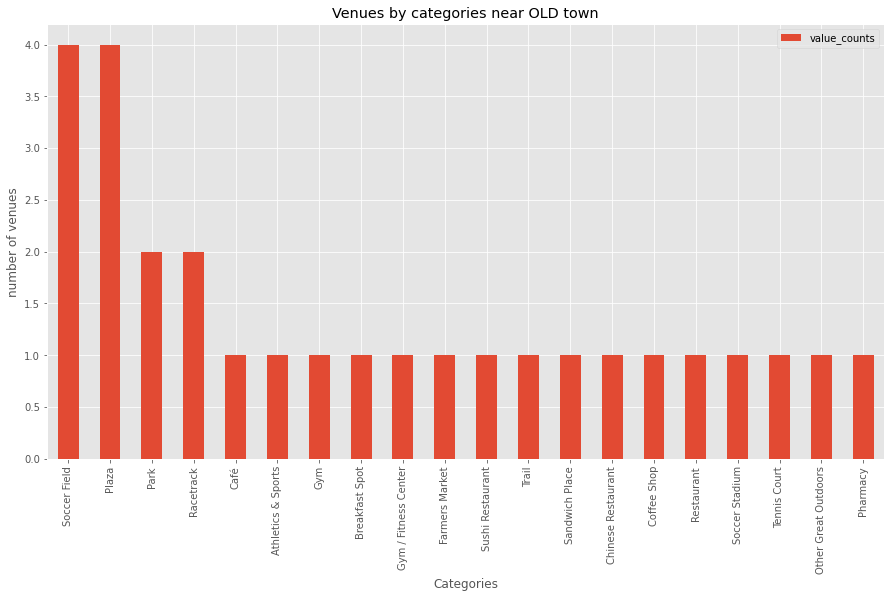

In [135]:
imu_categories_counts.plot(kind='bar', figsize=(15,8))
plt.title('Venues by categories near OLD town')
plt.xlabel('Categories')
plt.ylabel('number of venues')

In [136]:
imu_categories_df

,categories
0,Park
1,Restaurant
2,Park
3,Racetrack
4,Trail
5,Plaza
6,Soccer Field
7,Coffee Shop
8,Tennis Court
9,Plaza


In [138]:
SportsLC= imu_categories_df[imu_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]

SportsLC

,categories
12,Gym / Fitness Center
16,Gym
24,Soccer Stadium


In [139]:
SpoLC_counts= pd.DataFrame(SportsLC['categories'].value_counts())
SpoLC_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

SpoLC_counts.index.name ='Categories'
SpoLC_counts.astype('int')
SpoLC_counts.sum()

value_counts    3
dtype: int64

In [141]:
Sports = imu_categories_df[imu_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]

imu_sports_counts= pd.DataFrame(sports['categories'].value_counts())
imu_sports_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

sports.index.name ='Categories'
imu_sports_counts

,value_counts
Gym / Fitness Center,4
Gym,3
Yoga Studio,1
Gym Pool,1
Stadium,1
Pool,1


In [142]:
SportsLC_imu= imu_categories_df[imu_categories_df['categories'].str.contains("Gym|Pool|GymPool|Gym / Fitness Center|Yoga Studio|Stadium")]

SportsLC_imu


imu_Spo_counts= pd.DataFrame(SportsLC_imu['categories'].value_counts())
imu_Spo_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_Spo_counts.index.name ='Categories'
imu_Spo_counts

,value_counts
Categories,
Gym / Fitness Center,1
Soccer Stadium,1
Gym,1


In [143]:

imu_Spo_counts['value_counts'].astype('int')
imu_Spo_counts.sum()

value_counts    3
dtype: int64


<!DOCTYPE html>
<html>
<body>

<p style="font-size:50px">Conclusion:</p>
<p style="font-size:20px">Based on the analysis of the number of "Sports Centres" in Vitacura. Santiago and Las Condes, Santiago, we noticed that there are 22 in Vitacura and only 3 Las Condes. 
If the owner of the sports centre wants to open his gym and does not want lots of competition, it's better to open it in Las Condes.</p>

</body>
</html>
